In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os
import pytz

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total.parquet')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,appliances,environment,water_heater,None
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0,furniture,living_room,sofa,None
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0,computers,notebook,None,None
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,electronics,smartphone,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120463,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23,construction,tools,light,None
345120464,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None
345120465,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,None,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,None,None,None,None
345120466,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None


In [ ]:
df[(df['category_lvl1'].isna()) & (df['event_type'] == 'view')]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
6,2019-10-01 00:00:08+00:00,view,17300353,2053013553853497655,None,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d,2019-10-01,0,None,None,None,None
7,2019-10-01 00:00:08+00:00,view,31500053,2053013558031024687,None,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6,2019-10-01,0,None,None,None,None
13,2019-10-01 00:00:15+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
15,2019-10-01 00:00:17+00:00,view,23100006,2053013561638126333,None,None,357.79,513642368,17566c27-0a8f-4506-9f30-c6a2ccbf583b,2019-10-01,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120389,2020-03-31 23:59:27+00:00,view,100107729,2232732092892971374,None,None,836.57,624428716,cde83d21-27a0-4aa7-b0b2-81f054ee8d60,2020-03-31,23,None,None,None,None
345120395,2020-03-31 23:59:29+00:00,view,100049773,2232732106860003995,None,None,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23,None,None,None,None
345120449,2020-03-31 23:59:50+00:00,view,26000666,2232732082474320004,None,None,14.49,605046407,aad1708a-85b7-4b53-92b7-f8a5f5341546,2020-03-31,23,None,None,None,None
345120465,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,None,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,None,None,None,None


In [ ]:
df[df['category_lvl1'].isna()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
6,2019-10-01 00:00:08+00:00,view,17300353,2053013553853497655,None,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d,2019-10-01,0,None,None,None,None
7,2019-10-01 00:00:08+00:00,view,31500053,2053013558031024687,None,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6,2019-10-01,0,None,None,None,None
13,2019-10-01 00:00:15+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
15,2019-10-01 00:00:17+00:00,view,23100006,2053013561638126333,None,None,357.79,513642368,17566c27-0a8f-4506-9f30-c6a2ccbf583b,2019-10-01,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120395,2020-03-31 23:59:29+00:00,view,100049773,2232732106860003995,None,None,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23,None,None,None,None
345120426,2020-03-31 23:59:43+00:00,cart,22700202,2232732091643068746,None,stels,171.18,515979190,5526811f-230a-4762-aaf2-ba97cb742a9b,2020-03-31,23,None,None,None,None
345120449,2020-03-31 23:59:50+00:00,view,26000666,2232732082474320004,None,None,14.49,605046407,aad1708a-85b7-4b53-92b7-f8a5f5341546,2020-03-31,23,None,None,None,None
345120465,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,None,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,None,None,None,None


### utc 시간을 데이터 수집 국가인 중동 시간에 맞춰변경

In [ ]:
# 2. GMT+5 기준 datetime 객체 생성 (임시 변환)
event_time_gmt5 = df['event_time'].dt.tz_convert(pytz.FixedOffset(5 * 60))

# 3. 기존 컬럼 수정 + 새 요일 컬럼 생성
df['event_date'] = event_time_gmt5.dt.date              # GMT+5 기준 날짜로 수정
df['event_hour'] = event_time_gmt5.dt.hour              # GMT+5 기준 시간으로 수정
df['weekday'] = event_time_gmt5.dt.day_name()           # GMT+5 기준 요일 새로 생성

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,5,None,None,None,None,Tuesday
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120463,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-04-01,4,construction,tools,light,None,Wednesday
345120464,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-04-01,4,appliances,personal,massager,None,Wednesday
345120465,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,None,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-04-01,4,None,None,None,None,Wednesday
345120466,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-04-01,4,appliances,personal,massager,None,Wednesday


### GMT5시간 기준으로 파일 저장

In [ ]:
df.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total_gmt5.parquet', index=False)

In [ ]:
# NaN인 category_lvl1 제거
df = df[df['category_lvl1'].notna()]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120461,2020-03-31 23:59:54+00:00,view,8700399,2232732089587859740,appliances.personal.hair_cutter,maxwell,17.76,597751823,54a07446-6197-4734-a71f-3ef7efb2b5a0,2020-04-01,4,appliances,personal,hair_cutter,None,Wednesday
345120462,2020-03-31 23:59:55+00:00,cart,5100375,2232732103101907535,electronics.clocks,xiaomi,84.94,635164513,c40d1b96-90aa-4cee-b9aa-9475d9c4f17f,2020-04-01,4,electronics,clocks,None,None,Wednesday
345120463,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-04-01,4,construction,tools,light,None,Wednesday
345120464,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-04-01,4,appliances,personal,massager,None,Wednesday


In [ ]:
for gmt_offset in range(4, 8):  # GMT+4 to GMT+7
    tz = pytz.FixedOffset(gmt_offset * 60)  # 분 단위 오프셋
    df[f'event_time_gmt{gmt_offset}'] = df['event_time'].dt.tz_convert(tz)
    df[f'hour_gmt{gmt_offset}'] = df[f'event_time_gmt{gmt_offset}'].dt.hour

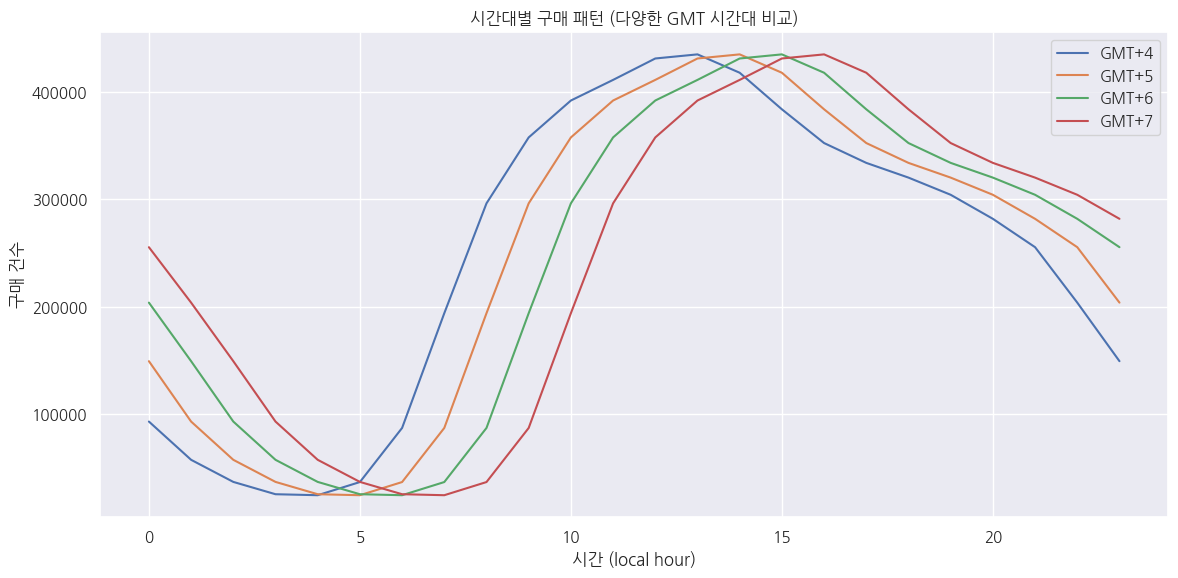

In [ ]:
plt.figure(figsize=(12, 6))

for gmt_offset in range(4, 8):
    hourly_counts = df[df['event_type'] == 'purchase'][f'hour_gmt{gmt_offset}'].value_counts().sort_index()
    plt.plot(hourly_counts.index, hourly_counts.values, label=f'GMT+{gmt_offset}')

plt.title('시간대별 구매 패턴 (다양한 GMT 시간대 비교)')
plt.xlabel('시간 (local hour)')
plt.ylabel('구매 건수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 진짜로 한번만 구매한 고객 저장

In [ ]:
# 1. 구매 이벤트만 필터링
df_purchase = df[df['event_type'] == 'purchase']

# 2. 고객별 구매 횟수 계산
purchase_counts = df_purchase.groupby('user_id').size().reset_index(name='purchase_count')

# 3. 한 번만 구매한 고객 ID 추출
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]['user_id']

# 4. 해당 고객의 구매 정보만 추출
df_one_time_purchase = df_purchase[df_purchase['user_id'].isin(one_time_buyers)]
df_one_time_purchase

# 5. parquet 파일로 저장
df_one_time_purchase.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_purchase_users.parquet', index=False)


In [ ]:
# user_id가 중복된 경우 확인
is_unique = df_one_time_purchase['user_id'].is_unique
print(f"user_id가 유일한가요? → {is_unique}")

user_id가 유일한가요? → True


# ✅ 카테고리별 평균 구매율 비교(파이, 막대)

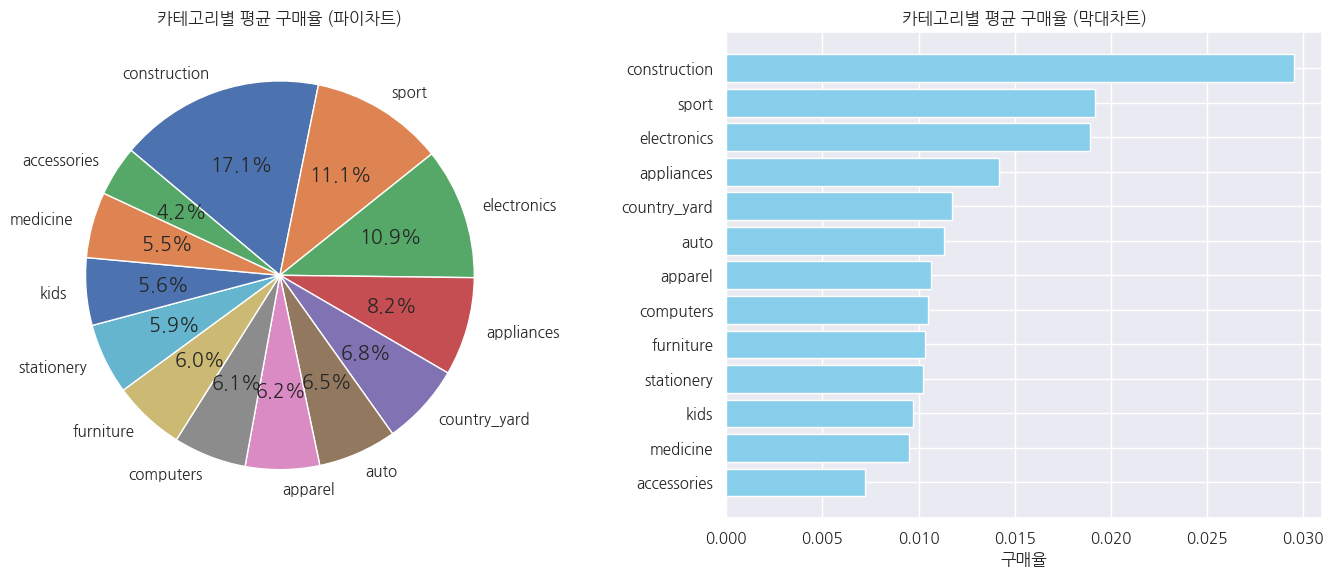

In [ ]:
# 1. 카테고리별 평균 구매율 계산
# 구매율 = 구매 수 / 전체 수 (유저 단위 or 이벤트 단위로 계산 방식 조정 가능)
category_stats = df.groupby('category_lvl1')['event_type'].apply(lambda x: (x == 'purchase').mean()).reset_index(name='purchase_rate')
category_stats = category_stats.sort_values('purchase_rate', ascending=False)

# 2. 시각화 (좌: 파이, 우: 막대)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ▶ 파이차트
axes[0].pie(
    category_stats['purchase_rate'],
    labels=category_stats['category_lvl1'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
axes[0].set_title('카테고리별 평균 구매율 (파이차트)')

# ▶ 막대차트
axes[1].barh(
    category_stats['category_lvl1'],
    category_stats['purchase_rate'],
    color='skyblue'
)
axes[1].invert_yaxis()  # 높은 구매율이 위로
axes[1].set_title('카테고리별 평균 구매율 (막대차트)')
axes[1].set_xlabel('구매율')

plt.tight_layout()
plt.show()

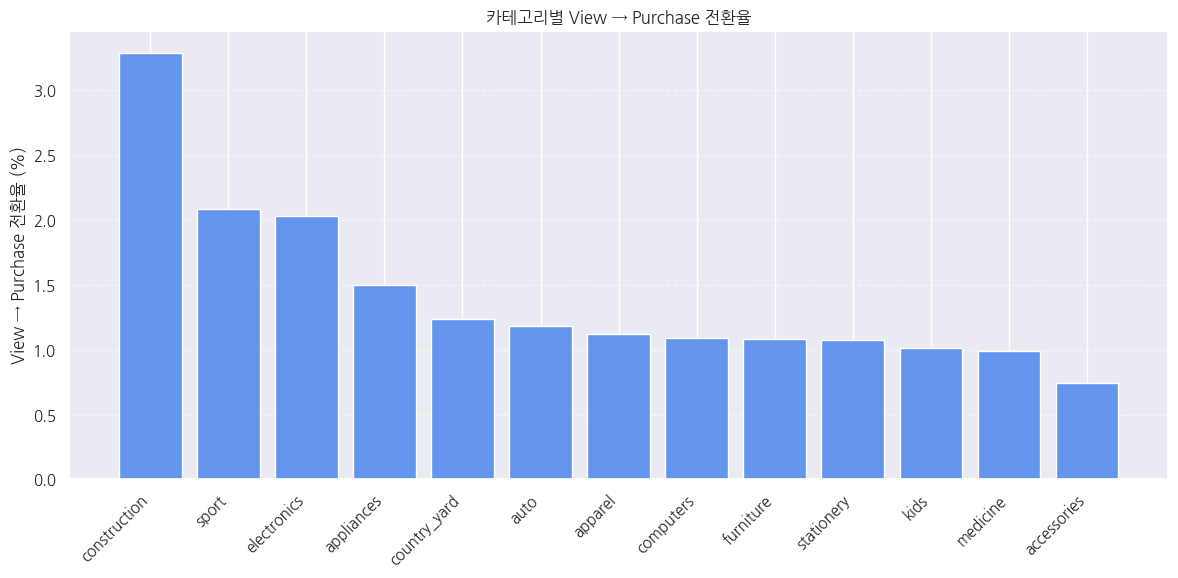

In [ ]:
# (1) view 수 집계
view_counts = df[df['event_type'] == 'view'].groupby('category_lvl1').size().reset_index(name='view_count')

# (2) purchase 수 집계
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size().reset_index(name='purchase_count')

# (3) 병합 후 전환율 계산
conversion_df = pd.merge(view_counts, purchase_counts, on='category_lvl1', how='inner')
conversion_df['conversion_rate'] = (conversion_df['purchase_count'] / conversion_df['view_count']) * 100

# (4) 정렬
conversion_df = conversion_df.sort_values('conversion_rate', ascending=False)

# (5) 시각화 (막대 차트)
plt.figure(figsize=(12, 6))
plt.bar(conversion_df['category_lvl1'], conversion_df['conversion_rate'], color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('View → Purchase 전환율 (%)')
plt.title('카테고리별 View → Purchase 전환율')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


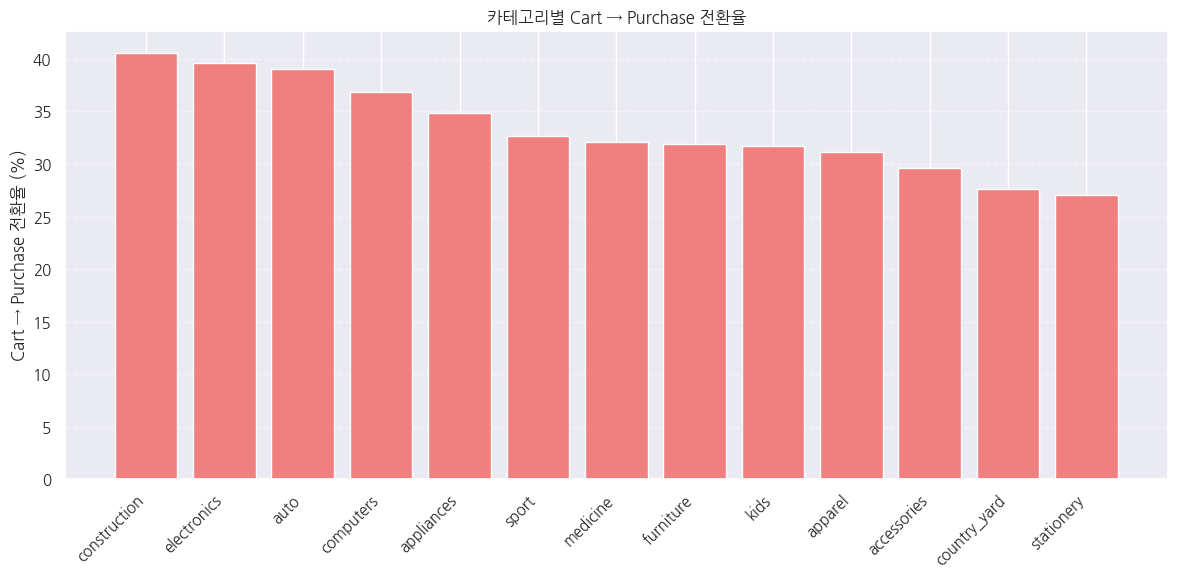

In [ ]:
# (1) cart 수 집계
cart_counts = df[df['event_type'] == 'cart'].groupby('category_lvl1').size().reset_index(name='cart_count')

# (2) purchase 수 집계
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size().reset_index(name='purchase_count')

# (3) 병합
conversion_df = pd.merge(cart_counts, purchase_counts, on='category_lvl1', how='inner')

# (4) 전환율 계산
conversion_df['conversion_rate'] = (conversion_df['purchase_count'] / conversion_df['cart_count']) * 100

# (5) 정렬
conversion_df = conversion_df.sort_values('conversion_rate', ascending=False)

# (6) 시각화
plt.figure(figsize=(12, 6))
plt.bar(conversion_df['category_lvl1'], conversion_df['conversion_rate'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cart → Purchase 전환율 (%)')
plt.title('카테고리별 Cart → Purchase 전환율')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ✅ 월별 카테고리별 구매 현황

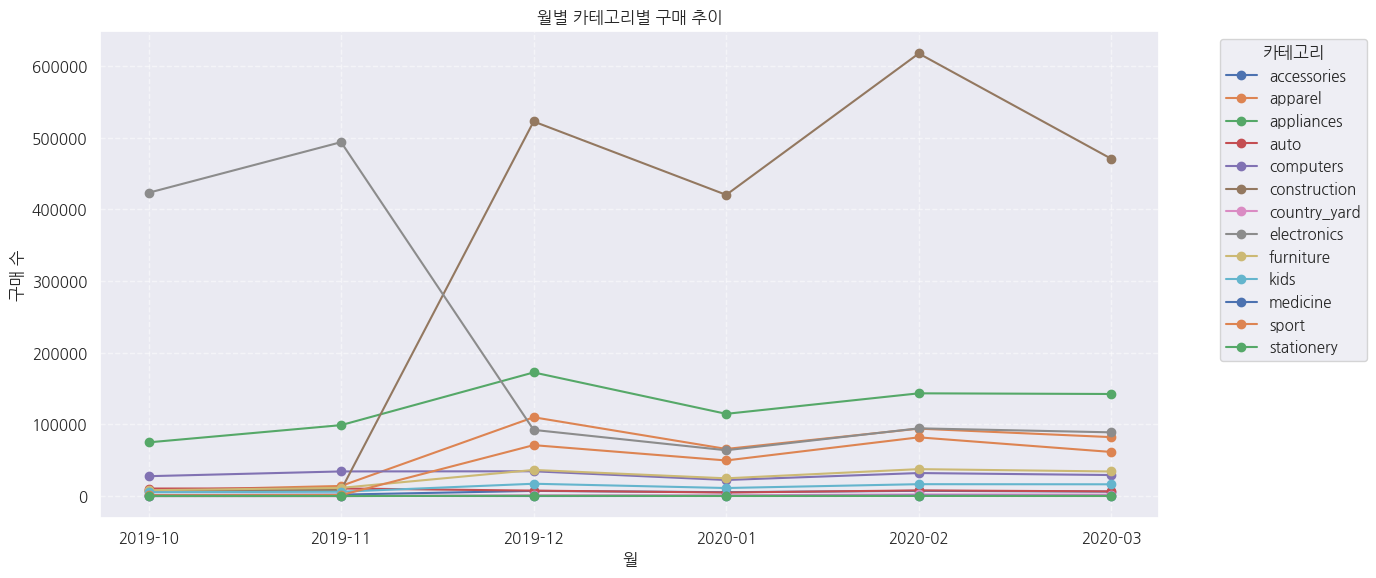

In [ ]:
# 1. purchase 이벤트만 필터링
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. 월 정보 추출
df_purchase['purchase_month'] = df_purchase['event_time'].dt.to_period('M').astype(str)

# 3. 월별 × 카테고리별 구매 수 집계
monthly_category_sales = df_purchase.groupby(['purchase_month', 'category_lvl1']).size().reset_index(name='purchase_count')

# 4. 피벗 테이블로 변환
pivot_table = monthly_category_sales.pivot(index='purchase_month', columns='category_lvl1', values='purchase_count').fillna(0)

# 5. 시각화
pivot_table.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('월별 카테고리별 구매 추이')
plt.xlabel('월')
plt.ylabel('구매 수')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 코호트 분석 시도!

In [ ]:
# 예시: 첫 구매일 기준 코호트 분석
df_purchase = df[df['event_type'] == 'purchase']
df_purchase['event_date'] = pd.to_datetime(df_purchase['event_time']).dt.to_period('M')

# 각 사용자별 첫 구매 월
first_purchase = df_purchase.groupby('user_id')['event_date'].min().reset_index()
first_purchase.columns = ['user_id', 'cohort_month']

# 전체 purchase 데이터에 첫 구매월을 merge
df_purchase = df_purchase.merge(first_purchase, on='user_id')

In [ ]:
# purchase 시점도 period(M)로 처리
df_purchase['purchase_month'] = df_purchase['event_date']

# Cohort index = (구매 월 - 첫 구매 월)로 리텐션 기간 계산
df_purchase['cohort_index'] = (
    df_purchase['purchase_month'].dt.to_timestamp() -
    df_purchase['cohort_month'].dt.to_timestamp()
).dt.days // 30


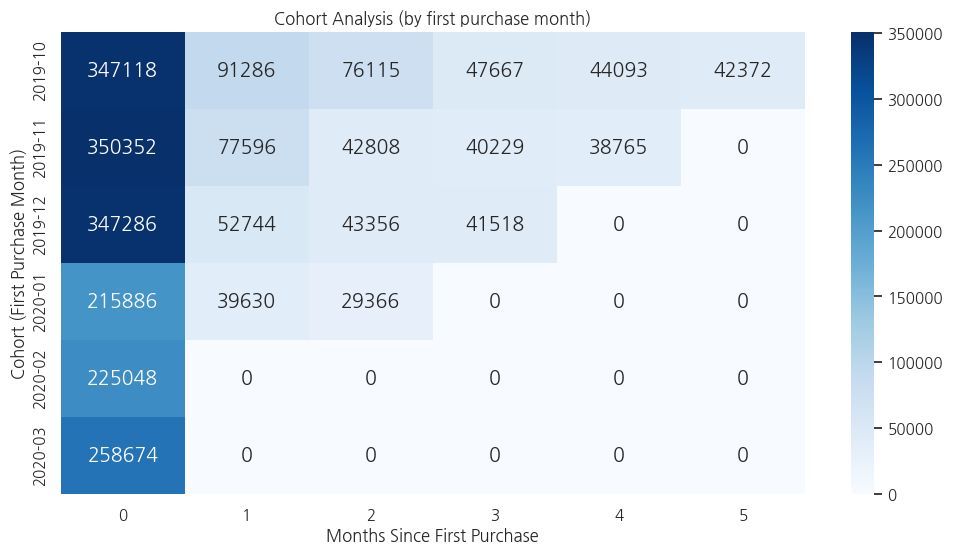

In [ ]:
cohort_counts = df_purchase.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(cohort_counts, annot=True, fmt='.0f', cmap='Blues')
plt.title('Cohort Analysis (by first purchase month)')
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')
plt.show()

✅ 코호트 분석이란?
: 비슷한 시점에 유입된 고객을 그룹으로 나누고 => 코호트
<br>그들의 행동이 시간에 따라 어떻게 달라지는지 추적하는 분석기법임

- 2019-10 ~ 12월에 유입된 고객은 비교적 높은 리텐션을 보였으나 2020년 이후 코호트는 이탈 속도가 빠르게 증가하고 있음

# ✅ 코호트 분석 결과 시간이 지날수록 이탈속도가 증가함
기간별 이탈/장기 고객 분석 진행

In [ ]:
# 1. 고객별 최초, 마지막 활동 시점 추출
user_activity = df.groupby('user_id')['event_time'].agg(['min', 'max']).reset_index()
user_activity.columns = ['user_id', 'first_event', 'last_event']

# 2. 이탈까지 걸린 시간 계산 (일 단위 or 월 단위)
user_activity['churn_days'] = (user_activity['last_event'] - user_activity['first_event']).dt.days
user_activity['churn_months'] = (user_activity['last_event'].dt.to_period('M') - user_activity['first_event'].dt.to_period('M')).apply(lambda x: x.n)

# 3. 분포 확인
print(user_activity.describe())


            user_id    churn_days  churn_months
count  1.352983e+07  1.352983e+07  1.352983e+07
mean   5.749533e+08  3.168159e+01  1.011276e+00
std    3.587995e+07  4.858844e+01  1.560270e+00
min    1.030022e+07  0.000000e+00  0.000000e+00
25%    5.481138e+08  0.000000e+00  0.000000e+00
50%    5.771535e+08  0.000000e+00  0.000000e+00
75%    6.035538e+08  5.200000e+01  2.000000e+00
max    6.351663e+08  1.820000e+02  5.000000e+00


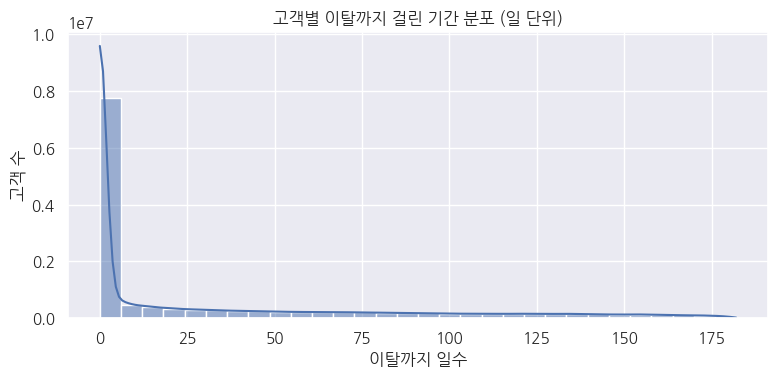

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(user_activity['churn_days'], bins=30, kde=True)
plt.title('고객별 이탈까지 걸린 기간 분포 (일 단위)')
plt.xlabel('이탈까지 일수')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

- 1일 이내 이탈이 많음 > 첫방문 경험이 매우 중요하게 작용할듯
- 3일 이내 활동 종료고객 90% 이상으로 추청됨 > 재방문 유도 전략 필요
- 장기 고객이 희귀함 > vip고객 정의 및 맞춤 전략 필요

### 1️⃣ 0-3일 이내 이탈 고객 vs 장기 고객 비교
-> 데이터를 원본에 병합했기때문에 이제부턴 df_merge를 사용해야됨

In [ ]:
# 고객별 시간 정렬
df_sorted = df.sort_values(by=['user_id', 'event_time']).copy()

# 이전 행동 시점 추가
df_sorted['prev_time'] = df_sorted.groupby('user_id')['event_time'].shift(1)

# 간격 계산 (일 단위)
df_sorted['gap_days'] = (df_sorted['event_time'] - df_sorted['prev_time']).dt.days

# 고객별 최대 공백(gap)
max_gap = df_sorted.groupby('user_id')['gap_days'].max().reset_index()
max_gap.columns = ['user_id', 'max_inactive_gap_days']

# 이탈 기준: 최대 공백 ≥ 30일이면 short_term
max_gap['churn_type'] = max_gap['max_inactive_gap_days'].apply(lambda x: 'short_term' if x >= 30 else 'long_term')

# 원본 df에 병합
df_merge = df.merge(max_gap[['user_id', 'churn_type']], on='user_id', how='left')


# ① 행동 패턴 차이
event_dist = df_merge.groupby(['churn_type', 'event_type'])['user_id'].count().unstack().fillna(0)
event_dist_pct = event_dist.div(event_dist.sum(axis=1), axis=0)

# ② 구매 여부
purchase_users = df[df['event_type'] == 'purchase']['user_id'].unique()
max_gap['purchased'] = max_gap['user_id'].isin(purchase_users)

purchase_rate = max_gap.groupby('churn_type')['purchased'].mean()

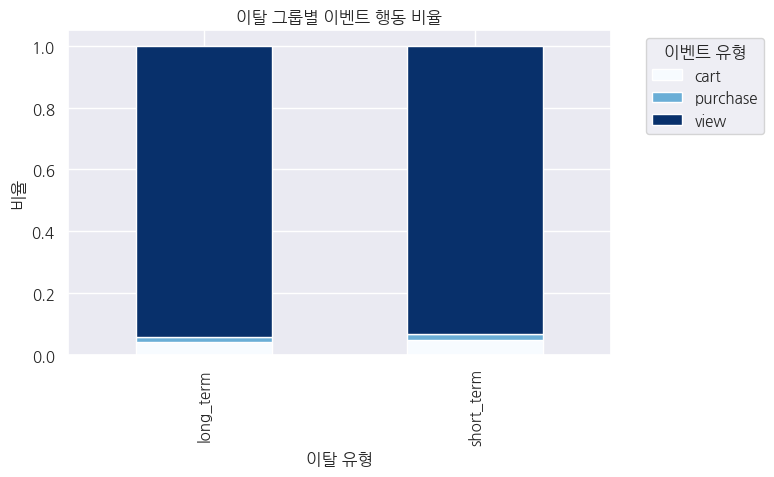

In [ ]:
# stacked bar chart: 행동 비율
event_dist_pct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Blues')
plt.title('이탈 그룹별 이벤트 행동 비율')
plt.ylabel('비율')
plt.xlabel('이탈 유형')
plt.legend(title='이벤트 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


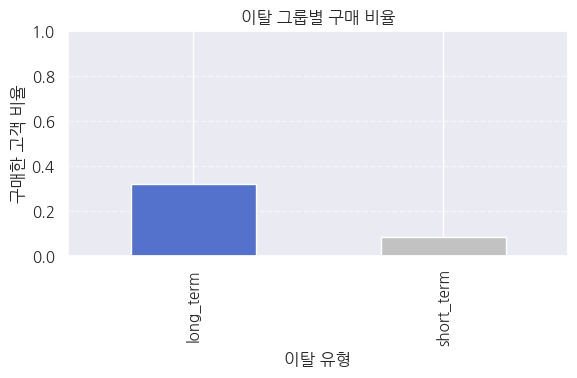

In [ ]:
# 막대그래프로 구매 비율 비교
purchase_rate.plot(kind='bar', color=['#5472cc', '#c2c2c2'], figsize=(6,4))
plt.title('이탈 그룹별 구매 비율')
plt.ylabel('구매한 고객 비율')
plt.xlabel('이탈 유형')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 고객별 이탈 타입 merge된 상태여야 함
# df_merge: user_id, event_type, event_time, category, churn_type 포함

# 이탈 고객 중에서 카테고리별로 몇 명인지 확인
churned_users_by_cat = df_merge[df_merge['churn_type'] == 'short_term'].groupby('category_lvl1')['user_id'].nunique()

# 전체 고객 기준 카테고리별 유저 수
total_users_by_cat = df_merge.groupby('category_lvl1')['user_id'].nunique()

# 이탈률 계산
churn_rate_by_cat = (churned_users_by_cat / total_users_by_cat).fillna(0)

# 정렬 (이탈률 기준)
churn_rate_by_cat_sorted = churn_rate_by_cat.sort_values(ascending=False)

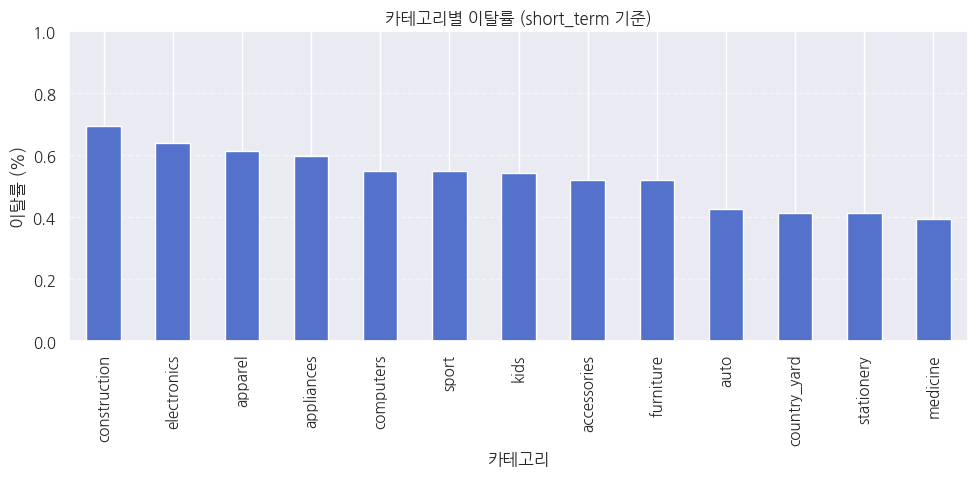

In [ ]:
plt.figure(figsize=(10,5))
churn_rate_by_cat_sorted.plot(kind='bar', color='#5472cc')
plt.title('카테고리별 이탈률 (short_term 기준)')
plt.ylabel('이탈률 (%)')
plt.xlabel('카테고리')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 카테고리별 이탈율은 10~40%로 눈에 띄게 높은 카테고리는 없음
- 이탈고객은 특정 카테고리에 국한되지 않고 전반적으로 일어나는 것 알 수 있음.

### ✅ short_term 고객의 행동 패턴 확인하기

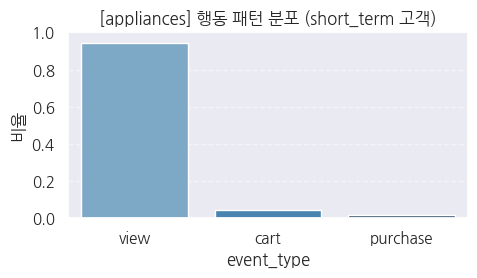

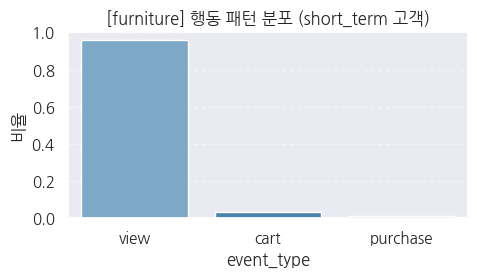

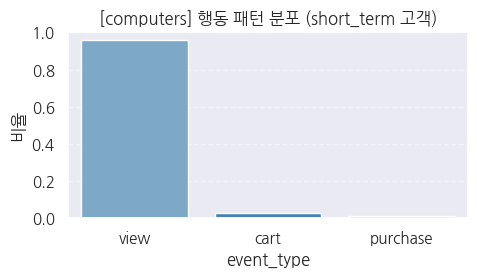

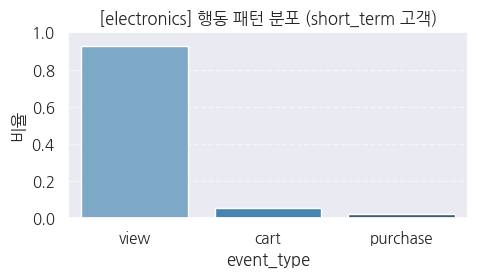

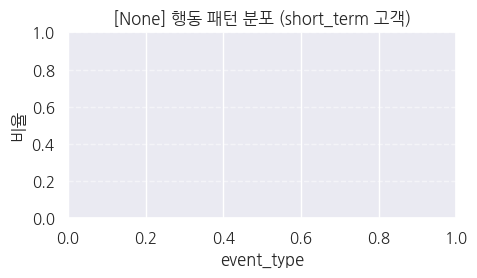

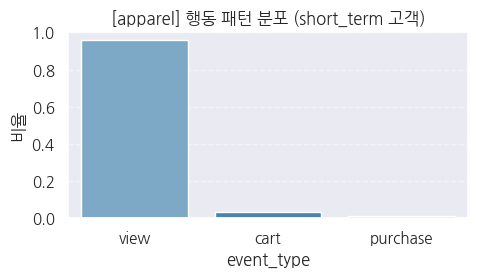

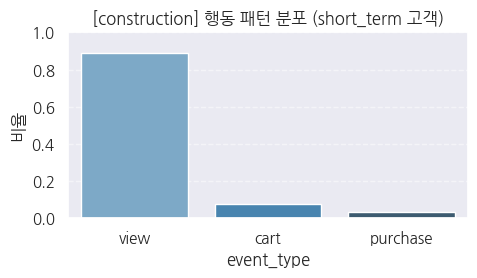

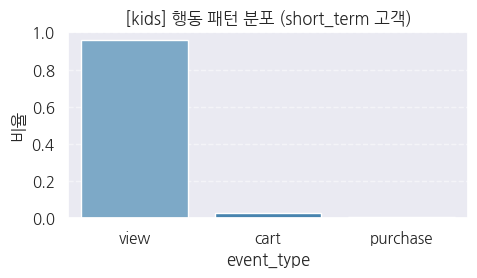

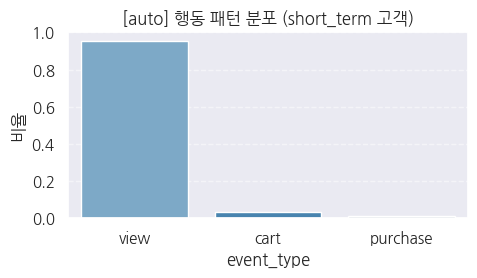

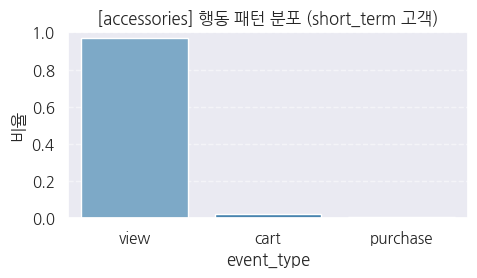

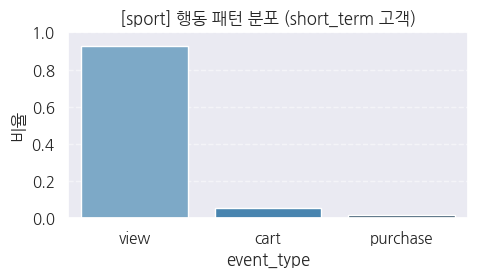

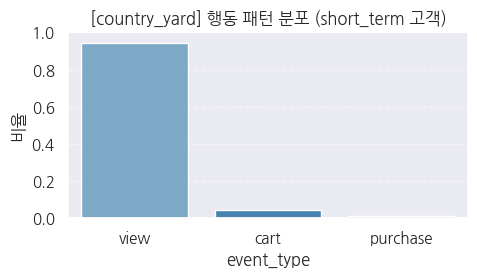

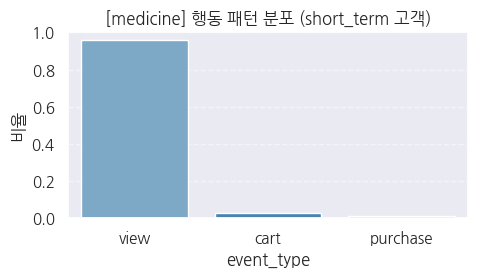

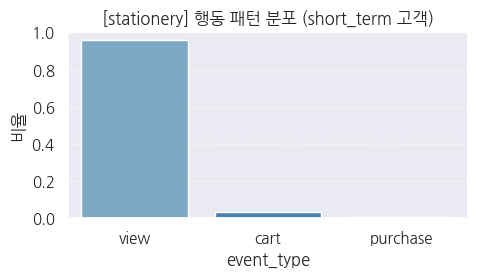

In [ ]:
# 1. short_term 고객만 필터링
df_short = df_merge[df_merge['churn_type'] == 'short_term'].copy()

# 2. 카테고리 리스트 추출
categories = df_short['category_lvl1'].unique()

# 3. 카테고리별 loop
for cat in categories:
    df_cat = df_short[df_short['category_lvl1'] == cat]

    # 이벤트 타입 비율 계산
    event_dist = df_cat['event_type'].value_counts(normalize=True)

    # 시각화
    plt.figure(figsize=(5,3))
    sns.barplot(x=event_dist.index, y=event_dist.values, palette='Blues_d')
    plt.title(f'[{cat}] 행동 패턴 분포 (short_term 고객)')
    plt.ylabel('비율')
    plt.xlabel('event_type')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

- view가 압도적으로 많음 > 제품페이지는 방문하지만 흥미유발 or 신뢰유도에 실패
- cart비율 극소 > 관심은 있었지만 가격, 배송 정보부족 등으로 이탈 가능성 있음
- purchase 없거나 매우 극소량 > 전환율 개선 시급

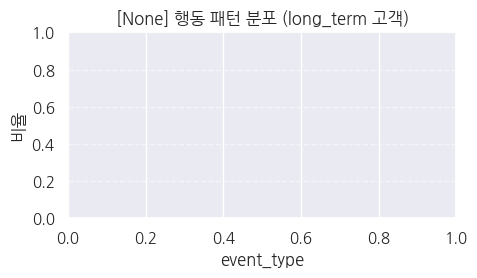

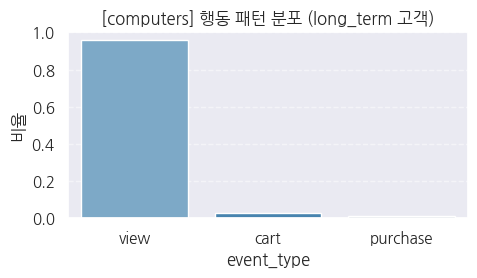

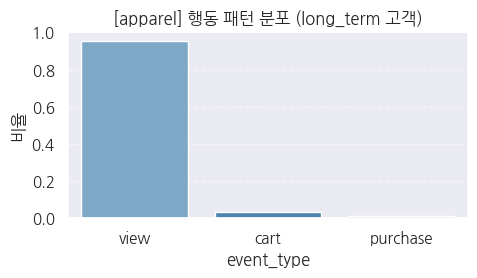

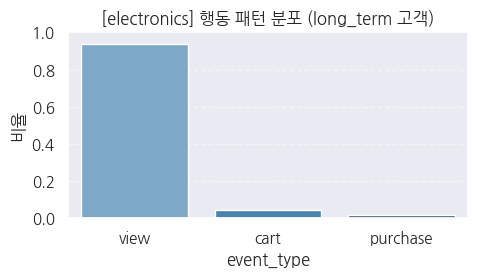

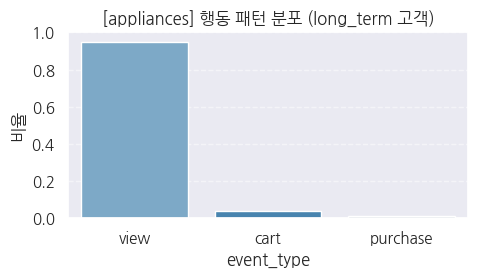

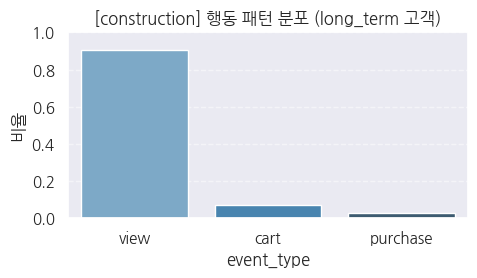

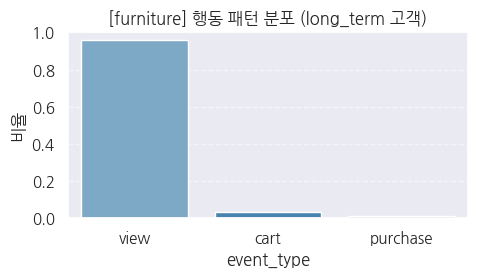

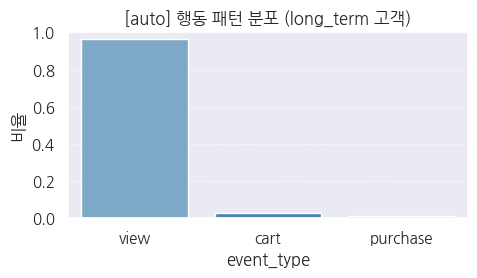

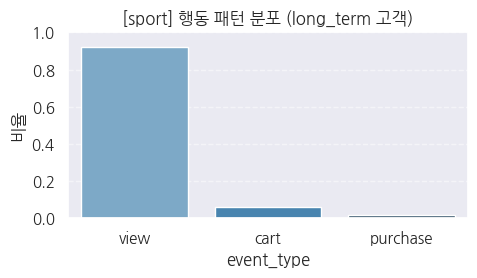

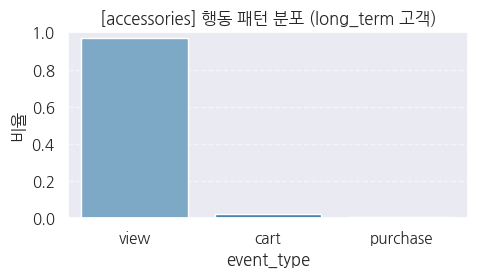

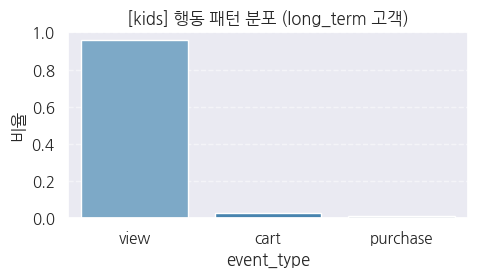

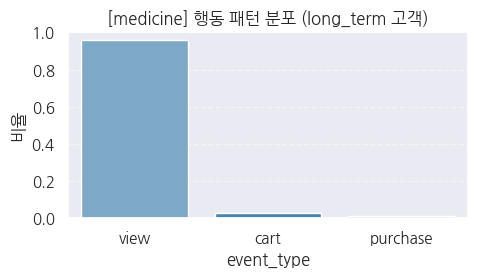

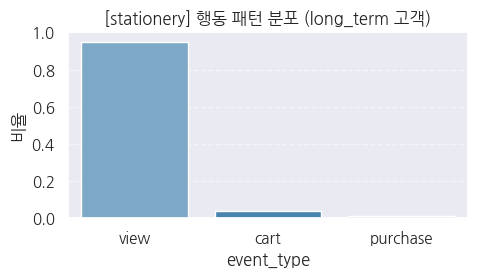

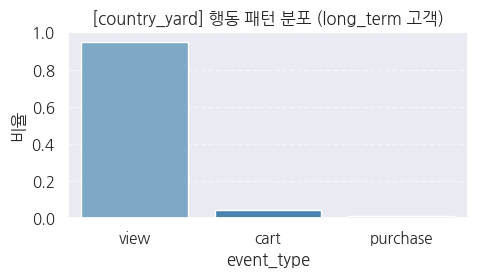

In [ ]:
# 1. long_term 고객 필터링
df_long = df_merge[df_merge['churn_type'] == 'long_term'].copy()

# 2. 카테고리 리스트 추출
categories = df_long['category_lvl1'].unique()

# 3. 카테고리별 반복 출력
for cat in categories:
    df_cat = df_long[df_long['category_lvl1'] == cat]

    # 이벤트 타입 비율 계산
    event_dist = df_cat['event_type'].value_counts(normalize=True)

    # 시각화
    plt.figure(figsize=(5,3))
    sns.barplot(x=event_dist.index, y=event_dist.values, palette='Blues_d')
    plt.title(f'[{cat}] 행동 패턴 분포 (long_term 고객)')
    plt.ylabel('비율')
    plt.xlabel('event_type')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# ① 고객별 이벤트 수 (view / cart / purchase)
event_counts = df_merge.pivot_table(index='user_id',
                               columns='event_type',
                               values='event_time',
                               aggfunc='count').fillna(0).reset_index()

# ② 고객별 세션 수
session_counts = df_merge.groupby('user_id')['user_session'].nunique().reset_index()
session_counts.columns = ['user_id', 'session_count']

# ③ 고객별 총 체류 시간 (각 세션에서 max - min을 구해서 더함)
session_time = df_merge.groupby(['user_id', 'user_session'])['event_time'].agg(['min', 'max']).reset_index()
session_time['duration_min'] = (session_time['max'] - session_time['min']).dt.total_seconds() / 60

stay_time = session_time.groupby('user_id')['duration_min'].sum().reset_index()
stay_time.columns = ['user_id', 'total_stay_minutes']


In [ ]:
# churn_type 정보
user_churn = df_merge[['user_id', 'churn_type']].drop_duplicates()

# 모든 지표 통합
df_user = user_churn \
    .merge(event_counts, on='user_id', how='left') \
    .merge(session_counts, on='user_id', how='left') \
    .merge(stay_time, on='user_id', how='left')


In [ ]:
compare_stats = df_user.groupby('churn_type').mean(numeric_only=True).T
compare_stats.columns = ['short_term_avg', 'long_term_avg']


In [ ]:
compare_stats = df_user.groupby('churn_type').mean(numeric_only=True).T

# user_id 제외
compare_stats = compare_stats.drop(index='user_id', errors='ignore')


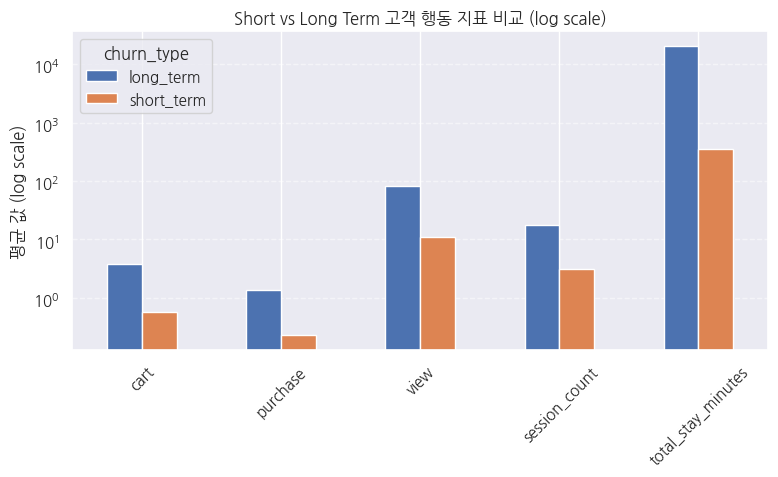

In [ ]:
compare_stats.plot(kind='bar', figsize=(8,5), logy=True)
plt.title('Short vs Long Term 고객 행동 지표 비교 (log scale)')
plt.ylabel('평균 값 (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 카테고리별 1회 구매 고객 수

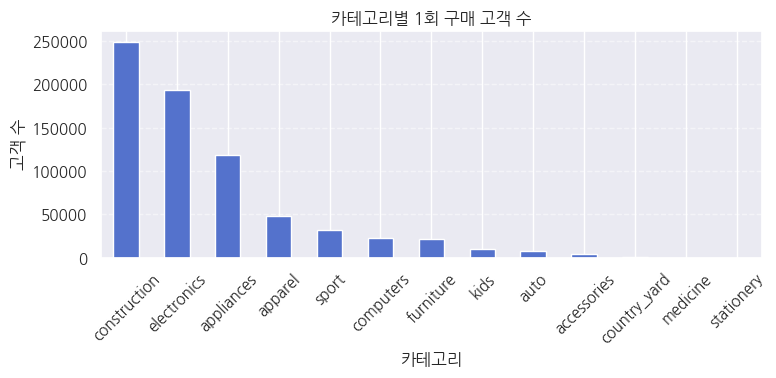

In [ ]:
plt.figure(figsize=(8,4))
df_one_time_purchase['category_lvl1'].value_counts().plot(kind='bar', color='#5472cc')
plt.title('카테고리별 1회 구매 고객 수')
plt.xlabel('카테고리')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- construction, electronics, apploances는 단발성 구매가 많은 상품군임
-> 리마인드 알림  or 추가 혜택 제공 등

### 월별 1회 구매 고객 수

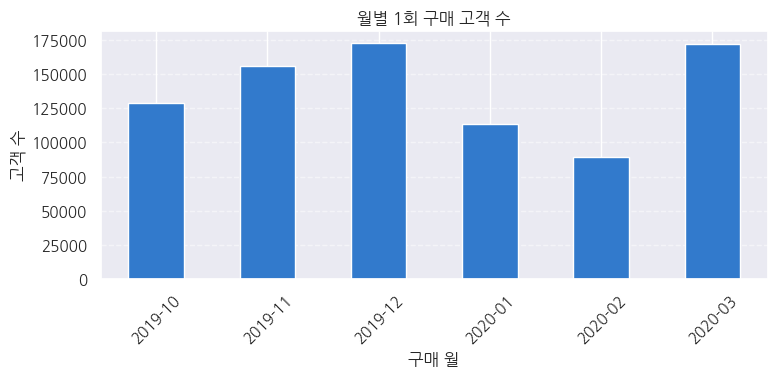

In [ ]:
# 날짜를 월 단위로 변환
df_one_time_purchase['purchase_month'] = df_one_time_purchase['event_time'].dt.to_period('M')

plt.figure(figsize=(8,4))
df_one_time_purchase['purchase_month'].value_counts().sort_index().plot(kind='bar', color='#327acc')
plt.title('월별 1회 구매 고객 수')
plt.xlabel('구매 월')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 10월-12월까지 고객 수는 점점 증가 추세 >> 연말이라는 특수성이 있음(블프, 크리스마스 등)

### 1회 구매 고객군 금액 분포 확인

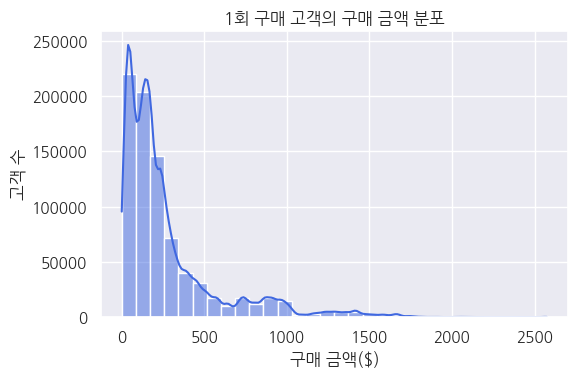

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_one_time_purchase['price'], bins=30, kde=True, color='#4068e0')
plt.title('1회 구매 고객의 구매 금액 분포')
plt.xlabel('구매 금액($)')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

- 0-200달러 사이에 1회 구매 고객이 압도적으로 많음(많은 고객이 소액구매자)
- 고가 구매자는 매우 드물음(전체 매출은 일부 고액구매자가 견인하는 구조일 수 있음)

### 1회 구매 고객의 금액대별 분포

In [ ]:
# 1. 구간 및 라벨 설정
bins = [0, 20, 50, 150, df_one_time_purchase['price'].max()]
labels = ['저가 (≤$20)', '중저가 ($20~50)', '중고가 ($50~150)', '고가 ($150↑)']

# 2. price_grade 컬럼 생성
df_one_time_purchase['price_grade'] = pd.cut(df_one_time_purchase['price'],
                                             bins=bins,
                                             labels=labels,
                                             include_lowest=True)

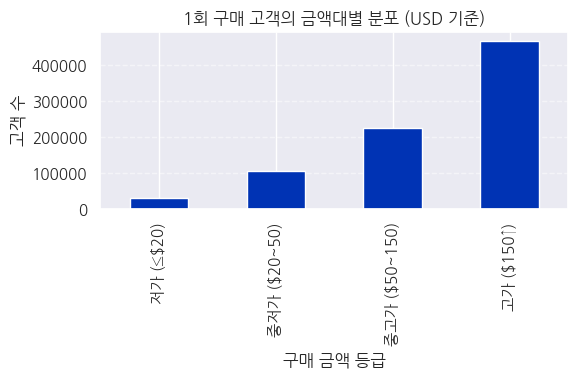

In [ ]:
plt.figure(figsize=(6,4))
df_one_time_purchase['price_grade'].value_counts().sort_index().plot(kind='bar', color='#0033B4')
plt.title('1회 구매 고객의 금액대별 분포 (USD 기준)')
plt.xlabel('구매 금액 등급')
plt.ylabel('고객 수')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- 1회 고객 중 고가 구매자가 많음
- 일반적인 소비패턴과 반대되며 대형상품(가전, 공구 등)일 가능성 높음
- 한번 큰 소비를 하고 다시 방문하지 않는 고객이 많다는 의미

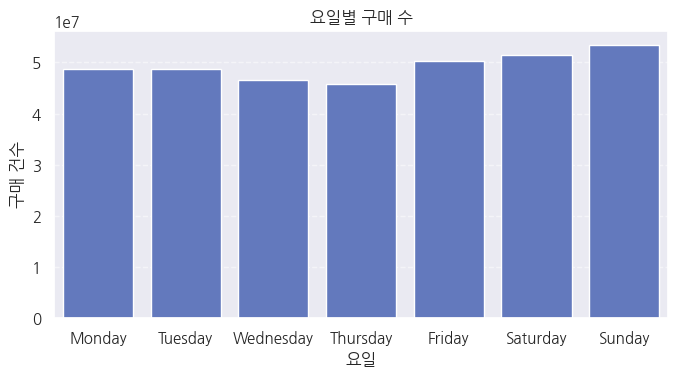

In [ ]:
# 요일 순서 정의
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='weekday_msk', order=weekday_order, color='#5472cc')
plt.title('요일별 구매 수')
plt.ylabel('구매 건수')
plt.xlabel('요일')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- 일요일에 구매량이 가장 많음
- 여유 시간에 쇼핑하는 고객이 많다는 의미

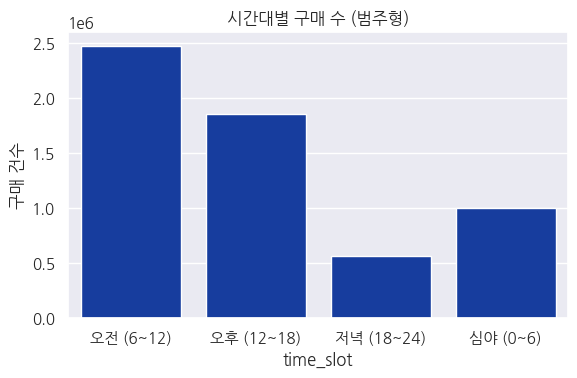

In [ ]:
# 시간대 구분 함수
def get_time_slot(hour):
    if 6 <= hour < 12:
        return '오전 (6~12)'
    elif 12 <= hour < 18:
        return '오후 (12~18)'
    elif 18 <= hour < 24:
        return '저녁 (18~24)'
    else:
        return '심야 (0~6)'

df_purchase['time_slot'] = df_purchase['hour'].apply(get_time_slot)

# 시간대별 구매 수
plt.figure(figsize=(6,4))
sns.countplot(data=df_purchase, x='time_slot', order=['오전 (6~12)', '오후 (12~18)', '저녁 (18~24)', '심야 (0~6)'], color='#0033B4')
plt.title('시간대별 구매 수 (범주형)')
plt.ylabel('구매 건수')
plt.tight_layout()
plt.show()
